In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters

In [ ]:
# Approach: to find out witch data are relevant I created a filter column
# 1) first filter column is for the 6M data lenght from first date:
# I have created new column which returns the date of the first review - 
# - of each product and the date rolls down in this new column (doesnt change for the particullar product) -
# - this date changes with the product change


# 2) to find out which reviews have at least 6M data I have created a second filter column:
# - I have found out what is the newest review data for all products (for instant_video 2014-07-23) and -
# - I substract 182 days from this date (now we know that if the first review is after 2014-01-22, the product can not -
# - have 6M of data), and created filter column with if statement, if the first review is after 2014-01-22

# now we have the data set we should be working with in the first task

In [2]:
# label the columns and create a date as a datetime from the Timestamp

df = pd.read_csv('ratings_Musical_Instruments.csv', names=['User', 'asin', 'Rating', 'Timestamp'])
df['Date'] = pd.to_datetime(df['Timestamp'], unit = 's', origin = 'unix', errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500176 entries, 0 to 500175
Data columns (total 5 columns):
User         500176 non-null object
asin         500176 non-null object
Rating       500176 non-null float64
Timestamp    500176 non-null int64
Date         500176 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 19.1+ MB


In [3]:
# group the dataframe by asin (product ID) and create a new dataframe with min. date for each product -
# - now we have 1 asin with 1 min. date
gr = df.groupby('asin')

df1 = pd.DataFrame(gr['Date'].min())

# set newly created set to a dataframe and merge this dataframe with the old one (df) = now we have created
# - new column min date ('Date-y') in a new dataframe = df3, maybe it could work by adding it to the basee dataframe (try it)
# the min. date resets with every new asin
# sort values by asin and date, apparently working only if u create new DF

df2 = df.merge(df1, on='asin', how='left').sort_values(['asin', 'Date_x'], ascending=True)

# find the number of days between the review date and the first review date for every single product

df2['delta_days'] = (df2['Date_x'] - df2['Date_y']).dt.days

In [4]:
df2.columns = ['User', 'asin', 'Rating', 'Timestamp', 'Date', 'min. Date', 'delta_days']
df2.head()

,User,asin,Rating,Timestamp,Date,min. Date,delta_days
0,A1YS9MDZP93857,0006428320,3.0,1394496000,2014-03-11,2014-03-11,0
1,A3TS466QBAWB9D,0014072149,5.0,1370476800,2013-06-06,2013-06-06,0
2,A3BUDYITWUSIS7,0041291905,5.0,1381708800,2013-10-14,2013-10-14,0
3,A19K10Z0D2NTZK,0041913574,5.0,1285200000,2010-09-23,2010-09-23,0
4,A14X336IB4JD89,0201891859,1.0,1350432000,2012-10-17,2012-10-17,0


In [5]:
# check the variable with min function - Date_y, wheter it works properly - 
# if in the column would be values with negative sign the function isnt working
# because the first date assigned to the product would be oldest reviewDate

check_function = df2.loc[(df2['delta_days'] <0)]
check_function

,User,asin,Rating,Timestamp,Date,min. Date,delta_days


In [ ]:
# By this point we have created the first filer column
# Now lets get to the second one

In [6]:
# find out what is the newest day in the dataframe 
df2.loc[:,'Date'].max()

Timestamp('2014-07-23 00:00:00')

In [7]:
# finding out the treshold date - which is 2014-07-23 minus 182 days (1/2 year)
newest_date = datetime(2014, 7, 23)
treshold_date = newest_date - timedelta(days=182)
print (treshold_date)

# to find out if products can have at least 6M data we have to filter out every product that has their first review after - 
# - 2014-01-22

2014-01-22 00:00:00


In [ ]:
# Now we have the second filter column, lets filter out only the data we need

In [8]:
# create a double if-statement to apply over the delta days column and Has at least 6M data column
# if delta is lover than 182 (cca 1/2 year) then the score was within 6M from the first score ever posted and we should
# include this score in out data sample, if not exclude the data

# finally create final dataset with only desired data wich includes:
# only t0 -> t+6 data for each product
# and product has >= 6M of data

final_df = df2.loc[(df2['delta_days'] <= 182) & (df2['min. Date'] < '2014-01-22')]
final_df.head()

# now we have the dataset we should work with 

,User,asin,Rating,Timestamp,Date,min. Date,delta_days
1,A3TS466QBAWB9D,0014072149,5.0,1370476800,2013-06-06,2013-06-06,0
2,A3BUDYITWUSIS7,0041291905,5.0,1381708800,2013-10-14,2013-10-14,0
3,A19K10Z0D2NTZK,0041913574,5.0,1285200000,2010-09-23,2010-09-23,0
4,A14X336IB4JD89,0201891859,1.0,1350432000,2012-10-17,2012-10-17,0
5,A2HR0IL3TC4CKL,0577088726,5.0,1371168000,2013-06-14,2013-06-14,0


In [9]:
# fot the purpose of finding out how many review each product has I created a cum-sum variable in our final_DF

final_df.loc[:, 'count'] = 1

gr1 = final_df.groupby('asin')['count']

C:\Users\dsimu\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\dsimu\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
final_df.loc[:, 'cum-sum'] = gr1.transform(np.cumsum)

In [11]:
# create new variable cum_sum_y which refers to the overall count of reviews of each product 
# e.g. if product has cum_sum_y row = 5 then we have 5 reviews within the 6M of the first posted review (included first review)

gr2 = final_df.groupby('asin')

final_df1 = pd.DataFrame(gr2['cum-sum'].max())

final_df2 = final_df.merge(final_df1, on='asin', how='left')

final_df2.head(20)

,User,asin,Rating,Timestamp,Date,min. Date,delta_days,count,cum-sum_x,cum-sum_y
0,A3TS466QBAWB9D,0014072149,5.0,1370476800,2013-06-06,2013-06-06,0,1,1,1
1,A3BUDYITWUSIS7,0041291905,5.0,1381708800,2013-10-14,2013-10-14,0,1,1,1
2,A19K10Z0D2NTZK,0041913574,5.0,1285200000,2010-09-23,2010-09-23,0,1,1,1
3,A14X336IB4JD89,0201891859,1.0,1350432000,2012-10-17,2012-10-17,0,1,1,1
4,A2HR0IL3TC4CKL,0577088726,5.0,1371168000,2013-06-14,2013-06-14,0,1,1,1
5,A2DHYD72O52WS5,0634029231,3.0,1119571200,2005-06-24,2005-06-24,0,1,1,1
6,A16WE7UU0QD33D,0634029347,5.0,1128211200,2005-10-02,2005-10-02,0,1,1,2
7,A1MUVHT8BONL5K,0634029347,2.0,1129334400,2005-10-15,2005-10-02,13,1,2,2
8,A1MUVHT8BONL5K,0634029355,2.0,1129334400,2005-10-15,2005-10-15,0,1,1,1
9,A2FEDDUHQAEN97,0634029363,1.0,1117497600,2005-05-31,2005-05-31,0,1,1,2


In [12]:
# cum-sum cumulates then number of reviews per each product
# total_review is the total number of reviews the products has in 6M

final_df2.columns = ['User', 'asin', 'Rating', 'Timestamp', 'Date', 'min. Date', 'delta_days', 'count', 'cum-sum','total_reviews']
final_df2.head(20)

,User,asin,Rating,Timestamp,Date,min. Date,delta_days,count,cum-sum,total_reviews
0,A3TS466QBAWB9D,0014072149,5.0,1370476800,2013-06-06,2013-06-06,0,1,1,1
1,A3BUDYITWUSIS7,0041291905,5.0,1381708800,2013-10-14,2013-10-14,0,1,1,1
2,A19K10Z0D2NTZK,0041913574,5.0,1285200000,2010-09-23,2010-09-23,0,1,1,1
3,A14X336IB4JD89,0201891859,1.0,1350432000,2012-10-17,2012-10-17,0,1,1,1
4,A2HR0IL3TC4CKL,0577088726,5.0,1371168000,2013-06-14,2013-06-14,0,1,1,1
5,A2DHYD72O52WS5,0634029231,3.0,1119571200,2005-06-24,2005-06-24,0,1,1,1
6,A16WE7UU0QD33D,0634029347,5.0,1128211200,2005-10-02,2005-10-02,0,1,1,2
7,A1MUVHT8BONL5K,0634029347,2.0,1129334400,2005-10-15,2005-10-02,13,1,2,2
8,A1MUVHT8BONL5K,0634029355,2.0,1129334400,2005-10-15,2005-10-15,0,1,1,1
9,A2FEDDUHQAEN97,0634029363,1.0,1117497600,2005-05-31,2005-05-31,0,1,1,2


In [13]:
# create a DF with not-duplicating asin and total number of reviews in 6M
gr4 = final_df2.groupby('asin')
final_df5 = pd.DataFrame(gr4['total_reviews'].max())

# create a DF with not-duplicating asin and date of first review for each product
final_df6 = pd.DataFrame(gr4['min. Date'].min())

# merge those two DF into one
final_df6 = final_df6.merge(final_df5, on='asin', how='left').sort_values(['min. Date'], ascending=True)
final_df6.head()

,min. Date,total_reviews
asin,,
630251228X,1998-04-25,1
B000001PJH,1998-05-27,1
B000003QV7,1998-06-18,1
B000002SO0,1998-07-07,2
B000005OMF,1998-07-07,4


In [14]:
# find out how many products have 1 review, 2 reviews, etc..
final_df6['count'] = 1
final_df7 = pd.DataFrame(final_df6.groupby('total_reviews').count()['count'])
final_df7.head()

# we can see that 51k products have just 1 review within 6M

,count
total_reviews,
1,51738
2,12456
3,4128
4,1751
5,888


In [15]:
final_df8 = final_df6.loc[(final_df6['total_reviews'] > 1)]
final_df8.head()

,min. Date,total_reviews,count
asin,,,
B000002SO0,1998-07-07,2,1
B000005OMF,1998-07-07,4,1
B000000919,1998-07-21,4,1
B0000009K4,1998-11-17,3,1
B000006U8S,1998-12-23,2,1


C:\Users\dsimu\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


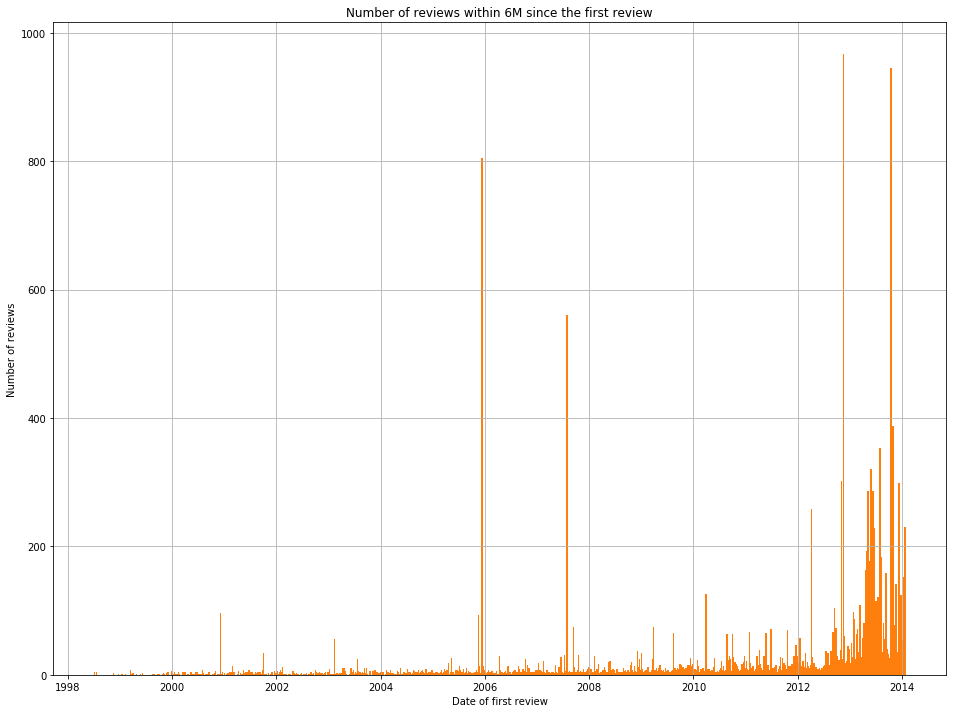

In [16]:
# creating the figure
fig = plt.figure(figsize=(16, 12))

# populate the figure with a plot
ax = fig.add_subplot(1, 1, 1)

# plot the data
ax.bar(final_df8['min. Date'], final_df8['total_reviews'])

# gridline
ax.grid()

# labels
ax.set_xlabel("Date of first review")
ax.set_ylabel("Number of reviews")

# title
ax.set_title("Number of reviews within 6M since the first review")

# tight layout
ax.bar(final_df8['min. Date'], final_df8['total_reviews'], width=10)

# display the figure
plt.show()

# close the FIG object
plt.close(fig)